<center>
    <h1>Deep Reinforcement Learning</h1>
</center>

# Brief Recap of Deep Reinforcement Learning

- Deep Reinforcement Learning (DRL) is a machine learning approach that combines deep neural networks with reinforcement learning to create systems that can learn optimal behaviors through interaction with an environment.

- It revolutionized autonomous decision-making by enabling agents to learn complex strategies directly from raw input data without explicit programming of rules or behaviors.

- Deep Reinforcement Learning has several key advantages over traditional machine learning approaches:
    1. End-to-end learning: Can learn directly from raw sensory inputs to actions
    2. Adaptability: Capable of learning and adjusting strategies in dynamic environments
    3. Generalization: Can transfer learned skills to similar but previously unseen situations

- DRL uses various algorithms like Deep Q-Networks (DQN), Policy Gradients, and Actor-Critic methods to achieve efficient learning in complex environments with large state and action spaces.

- It has become foundational for many cutting-edge applications, including game playing, robotics control, autonomous vehicles, and resource management systems.

- Popular DRL frameworks and implementations include OpenAI Gym, Stable Baselines, RLlib, and TensorFlow-Agents, each offering different features and optimization capabilities.

- These technologies continue to evolve, finding new applications across industries such as healthcare, finance, manufacturing, and logistics optimization.

<center>
    <img src="static/image1.gif" alt="Deep Reinforcement Learning Example" style="width:50%;">
</center>

## Architecture of Deep Reinforcement Learning

- Deep Reinforcement Learning architectures are specialized neural network systems designed to learn optimal decision-making policies through environment interaction and reward optimization.

- They revolutionized autonomous learning by combining deep neural networks with traditional reinforcement learning principles, enabling end-to-end learning from raw inputs to actions.

- Deep RL architectures have several fundamental components:
    1. Input Processing: Handles raw state information from the environment
    2. Feature Extraction: Transforms raw inputs into meaningful representations
    3. Policy/Value Estimation: Determines actions or state values
    4. Action Selection: Chooses optimal actions based on learned policies

- The architecture typically consists of multiple interconnected layers:
    1. Input Layer: Receives state observations from the environment
    2. Hidden Layers: Process and transform state information
    3. Output Layer: Generates action probabilities or value estimates
    4. Memory Buffer: Stores experience for replay and learning

- These architectures employ various optimization techniques:
    1. Experience Replay: Stores and reuses past experiences
    2. Target Networks: Stabilizes training through delayed updates
    3. Advantage Estimation: Improves policy gradient calculations

- Popular architectural variants include:
    - Deep Q-Networks (DQN) for discrete action spaces
    - Policy Gradient Networks for continuous action spaces
    - Actor-Critic Networks for combined policy and value learning

- These architectures continue to evolve, incorporating new advances in deep learning such as attention mechanisms, transformers, and multi-agent learning capabilities.

<center>
    <img src="static/image2.jpg" alt="Deep Reinforcement Learning" style="width:50%;">
</center>

## Applications of Deep Reinforcement Learning

Deep Reinforcement Learning (DRL) is a powerful approach that combines deep learning and reinforcement learning to solve complex problems in various domains such as:

- Robotics
    - **Autonomous Navigation**: DRL is used to train robots for navigation tasks in dynamic environments. Robots learn to make decisions based on sensory input to navigate through obstacles and reach goals.
    - **Manipulation Tasks**: In industrial settings, DRL helps robots learn to perform tasks like picking, placing, and assembling objects with precision.

- Game Playing
    - **Atari Games**: DRL algorithms, such as Deep Q-Networks (DQN), have been successfully applied to play Atari games, achieving superhuman performance in many cases.
    - **Board Games**: DRL has been used in games like Go (AlphaGo) and chess, where agents learn strategies through self-play, leading to groundbreaking results.

- Finance
    - **Algorithmic Trading**: DRL can optimize trading strategies by learning from historical market data and making buy/sell decisions to maximize returns.
    - **Portfolio Management**: It helps in dynamically adjusting asset allocations in a portfolio to balance risk and reward based on changing market conditions.

- Healthcare
    - **Personalized Treatment Plans**: DRL can assist in developing personalized treatment strategies by learning optimal interventions for individual patients based on their health data.
    - **Drug Discovery**: In pharmaceuticals, DRL models are utilized to explore molecular space for potential drug candidates by predicting interactions and outcomes.

- Transportation
    - **Traffic Signal Control**: DRL algorithms optimize traffic light timings to reduce congestion and improve traffic flow in urban areas.
    - **Autonomous Vehicles**: DRL is integral to developing autonomous driving systems, enabling vehicles to make real-time decisions based on environmental conditions.

- Natural Language Processing
    - **Dialogue Systems**: DRL enhances conversational agents by optimizing response strategies based on user interactions, leading to more engaging and context-aware dialogues.
    - **Text Summarization**: It is applied to learn how to summarize text effectively by evaluating the quality of generated summaries through reinforcement signals.

- Energy Management
    - **Smart Grid Optimization**: DRL can optimize energy distribution and consumption in smart grids, balancing supply and demand while minimizing costs.
    - **Demand Response**: It helps in managing energy consumption patterns in response to changing prices and grid conditions, promoting efficient energy usage.

- Game Development
    - **Procedural Content Generation**: DRL is used to create dynamic and adaptive game content, enhancing player experience by adjusting difficulty levels based on player performance.
    - **Player Behavior Modeling**: It can model and predict player behavior to improve game design and user engagement.

# Implementing some core concepts of building a Deep Reinforcement Learning Model with Tensorflow

In [1]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

`gym`: OpenAI Gym is a toolkit for developing and comparing reinforcement learning algorithms. We use it to create the environment (CartPole in this case).

## Environment Setup

- `env = gym.make('CartPole-v1')`: We create an instance of the CartPole environment where the agent will interact and learn. The environment provides the state, action space, and rewards.
- `state_shape`: This variable holds the shape of the state space (input) for the neural network. For CartPole, the state consists of position, velocity, angle, and angular velocity.
- `num_actions`: This is the number of possible actions the agent can take, which is 2 (move left or right).

In [2]:
env = gym.make('CartPole-v1')
state_shape = env.observation_space.shape
num_actions = env.action_space.n

## Defining the Q-Network

- **Q-Network**: This neural network approximates the Q-value function. It takes the state as input and outputs the Q-values for all possible actions.
    - `layers.Dense(128, activation='relu')`: We use fully connected layers (Dense) with 128 neurons, using the ReLU activation function to introduce non-linearity.
    - `layers.Dense(num_actions)`: The output layer has `num_actions` neurons (2 for CartPole), each representing the predicted Q-value for that action.
    - `Sequential`: A simple feed-forward neural network where each layer's output is the next layer's input.

In [3]:
def create_q_network(state_shape, num_actions):
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=state_shape),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_actions)
    ])
    return model

## Defining the Replay Buffer

- **Replay Buffer**: This class stores past experiences in the form of `(state, action, reward, next_state, done)` tuples.
- **add()**: This method adds new experiences to the buffer. If the buffer is full, it replaces older experiences in a circular manner.
- **sample()**: It randomly selects a batch of experiences from the buffer to break correlations between consecutive experiences. This helps stabilize training.
- **Purpose**: Replay buffer allows the agent to learn from a wider variety of experiences, enhancing sample efficiency and reducing instability in training.

In [4]:
class ReplayBuffer:
    def __init__(self, size):
        self.buffer = []
        self.max_size = size
        self.size = 0

    def add(self, experience):
        if self.size < self.max_size:
            self.buffer.append(experience)
            self.size += 1
        else:
            self.buffer[self.size % self.max_size] = experience

    def sample(self, batch_size):
        idx = np.random.choice(len(self.buffer), batch_size)
        return [self.buffer[i] for i in idx]

## Epsilon-Greedy Policy for Exploration

- **Epsilon-Greedy Policy**: This policy balances exploration and exploitation.
  - **Exploration**: With a probability `epsilon`, the agent takes a random action, encouraging exploration of new states.
  - **Exploitation**: With a probability `1 - epsilon`, the agent chooses the action with the highest Q-value, exploiting current knowledge.
- `np.random.rand() < epsilon`: Generates a random number between 0 and 1. If it’s less than `epsilon`, the agent explores; otherwise, it exploits.

In [5]:
def epsilon_greedy_policy(q_values, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(num_actions)
    else:
        return np.argmax(q_values)

## Training the DQN

```python
def train_dqn(env, episodes, batch_size=64, gamma=0.99, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.1):
    # Create Q-network and target Q-network
    q_network = create_q_network(state_shape, num_actions)
    target_q_network = create_q_network(state_shape, num_actions)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    loss_fn = tf.keras.losses.MeanSquaredError()

    replay_buffer = ReplayBuffer(100000)  # Large replay buffer
```

### Explanation:
- **Q-Network**: The main neural network that learns to approximate the Q-values.
- **Target Q-Network**: A separate network used to stabilize training. The weights of this network are updated less frequently (every few episodes) to avoid oscillating Q-values during training.
- **Optimizer**: Adam optimizer is used to minimize the loss by adjusting the network's weights.
- **Loss Function**: Mean Squared Error is used to minimize the difference between the predicted Q-values and the target Q-values.
- **Replay Buffer**: A buffer with a size of 100,000 to store experiences.

```python
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            state_input = np.expand_dims(state, axis=0).astype(np.float32)
            q_values = q_network(state_input)
            action = epsilon_greedy_policy(q_values, epsilon)
            
            # Take the chosen action in the environment
            next_state, reward, done, _ = env.step(action)
            replay_buffer.add((state, action, reward, next_state, done))

            state = next_state
            total_reward += reward
```

### Explanation:
- **Episode Loop**: The outer loop runs for the specified number of episodes. Each episode is a complete run of the environment (from start to terminal state).
- `env.reset()`: Resets the environment to the initial state.
- **Action Selection**: The agent selects an action using the epsilon-greedy policy based on the Q-values predicted by the Q-network.
- **Environment Interaction**: `env.step(action)` executes the selected action and returns the next state, reward, and whether the episode is done.
- **Experience Storage**: The `(state, action, reward, next_state, done)` tuple is stored in the replay buffer for future training.
- **Total Reward**: Tracks the cumulative reward obtained by the agent in the episode.

```python
            if len(replay_buffer.buffer) > batch_size:
                # Sample a batch from the replay buffer
                experiences = replay_buffer.sample(batch_size)
                states, actions, rewards, next_states, dones = map(np.array, zip(*experiences))

                # Predict Q-values for the next states using the target network
                next_q_values = target_q_network(next_states)
                max_next_q_values = np.max(next_q_values, axis=1)

                # Bellman equation for the target Q-value
                targets = rewards + gamma * max_next_q_values * (1 - dones)
```

### Explanation:
- **Experience Sampling**: A batch of experiences is sampled from the replay buffer once there are enough experiences to fill the batch.
- **Target Calculation**: 
  - `next_q_values`: The Q-values for the next states are predicted by the target network.
  - `max_next_q_values`: The highest Q-value for the next state is chosen (maximizing future reward).
  - **Bellman Equation**: The target Q-value is calculated using the Bellman equation: `reward + (discount factor * max future reward)`. The factor `(1 - dones)` ensures that no future reward is added if the episode is done.

```python
                # Gradient descent to update the Q-network
                with tf.GradientTape() as tape:
                    q_values = q_network(states)
                    action_masks = tf.one_hot(actions, num_actions)
                    q_values_taken = tf.reduce_sum(q_values * action_masks, axis=1)
                    loss = loss_fn(targets, q_values_taken)

                grads = tape.gradient(loss, q_network.trainable_variables)
                optimizer.apply_gradients(zip(grads, q_network.trainable_variables))
```

### Explanation:
- **Q-Value Prediction**: The Q-network predicts the Q-values for the batch of states.
- **Action Mask**: A one-hot mask is created for the actions taken in those states to extract the Q-values corresponding to the actions the agent chose.
- **Loss Calculation**: The difference between the predicted Q-values and the target Q-values is calculated using Mean Squared Error.
- **Gradient Descent**: The gradients of the loss are computed with respect to the network's weights, and the optimizer applies these gradients to update the Q-network's parameters.

```python
            if done:
                print(f"Episode {episode + 1}, Total Reward: {total_reward}")
                break

        # Update epsilon for the next episode
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

        # Periodically update the target network
        if episode % 10 == 0:
            target_q_network.set_weights(q_network.get_weights())
```

# Let's Build a Real world project to understand the concept of Deep Reinfocement Learning better

## Problem Description

- The goal of the Cart-Pole problem is to develop an agent that learns to balance the pole by applying the correct forces to the cart. 

- This requires the agent to continuously adjust its actions based on the pole's current angle and velocity, learning to maintain balance over time.

## CartPole Dataset Description

### Environment Overview

The dataset in the CartPole environment is generated through agent-environment interactions. Each instance of the dataset represents the current state of the system, the action taken by the agent, and the resulting next state and reward. The dataset is used to train a reinforcement learning agent, such as a Deep Q-Network (DQN), to learn optimal policies.

### Features (State Space)

The state space in the CartPole environment is a continuous space described by four key features:

1. **Cart Position**:
   - **Type**: Continuous (Float)
   - **Range**: [-2.4, 2.4]
   - Describes the position of the cart along the horizontal axis of the track.

2. **Cart Velocity**:
   - **Type**: Continuous (Float)
   - **Range**: [-Inf, Inf]
   - Represents the speed and direction of the cart's movement.

3. **Pole Angle**:
   - **Type**: Continuous (Float)
   - **Range**: [-41.8°, 41.8°] (measured in radians)
   - Describes the angle of the pole relative to the vertical axis.

4. **Pole Angular Velocity**:
   - **Type**: Continuous (Float)
   - **Range**: [-Inf, Inf]
   - Represents the rate of change of the pole's angle, indicating how quickly it is falling or rising.

### Actions

The action space is discrete, consisting of two possible actions:

1. **Move Cart Left (Action = 0)**:
   - The agent applies a force to move the cart to the left.

2. **Move Cart Right (Action = 1)**:
   - The agent applies a force to move the cart to the right.

### Rewards

- **Reward**: A constant reward of **+1** is given for each time step where the pole remains upright (i.e., the agent successfully balances the pole).
- The goal of the agent is to maximize cumulative rewards over an episode.

### Episode Termination Conditions

The environment episode ends when one of the following conditions is met:
1. **Pole Angle exceeds ±12°**: The pole falls beyond a certain angle threshold.
2. **Cart Position exceeds ±2.4 units**: The cart moves off the edge of the track.
3. **Max Time Steps (500)**: The agent successfully balances the pole for 500 time steps (win condition).

### Sample Data Instance

A typical dataset instance consists of the following elements:
```plaintext
[State, Action, Reward, Next State, Done]

## Setting up the Environment

In [ ]:
# Importing the required libraries
import gym
import numpy as np
import random
from collections import deque
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
import matplotlib.pyplot as plt  # Importing Matplotlib for visualization

### Variable Descriptions

- **`state_size`**: This variable will hold the size of the state space, which represents the number of features used to describe the environment. For the CartPole problem, this typically includes variables such as the cart position, cart velocity, pole angle, and pole velocity at the tip.

- **`action_size`**: This variable represents the number of possible actions the agent can take. In the CartPole environment, there are generally two actions: moving the cart left or moving it right.

- **`memory`**: This is a deque (double-ended queue) that will store experiences of the agent during training. The experiences are used for training the model and are limited to the most recent 2000 entries. This helps in efficient memory management by discarding older experiences that may not be relevant.

- **`gamma`**: This is the discount factor used in reinforcement learning. It determines the importance of future rewards. A value closer to 1 means that future rewards are considered almost equally to immediate rewards, while a value closer to 0 makes the agent focus on immediate rewards. In this case, `gamma` is set to 0.95.

- **`epsilon`**: This is the exploration rate, which controls how often the agent explores new actions versus exploiting known actions. Initially set to 1.0, it encourages the agent to explore the action space. Over time, `epsilon` will decay to promote more exploitation of learned behaviors.

- **`epsilon_min`**: This variable defines the minimum value that `epsilon` can decay to. This ensures that the agent maintains some level of exploration even after extensive training.

- **`epsilon_decay`**: This factor determines how quickly the exploration rate decays. In this case, it is set to 0.995, meaning the agent will gradually reduce its exploration rate after each episode, allowing it to exploit its learned knowledge more over time.

- **`learning_rate`**: This variable sets the learning rate for the Q-learning algorithm, which controls how much the model's weights are updated during training. A smaller learning rate leads to smaller updates and slower convergence.

- **`model`**: This variable will eventually hold the neural network model that approximates the Q-values for each action given a state. It will be defined and trained later in the code.

The following global variables are defined to set up the environment and the parameters for the Deep Q-Learning model:

In [ ]:
# Global variables
state_size = 0
action_size = 0
memory = deque(maxlen=2000)
gamma = 0.95    # discount rate
epsilon = 1.0   # exploration rate
epsilon_min = 0.01
epsilon_decay = 0.995
learning_rate = 0.001
model = None

### Parameter Descriptions

- **`patience`**: This parameter sets the maximum number of consecutive episodes that the training process will wait for an improvement in performance (reward). In this case, it is set to 20 episodes. If the agent does not achieve a better reward within these episodes, training will be halted.

- **`best_reward`**: This variable is initialized to negative infinity (`-float('inf')`). It will hold the highest reward received by the agent during training. Each time the agent achieves a reward greater than `best_reward`, this variable will be updated. This allows us to track the best performance of the agent.

- **`wait`**: This counter keeps track of the number of consecutive episodes since the last improvement in reward. It starts at 0 and increments each time the agent fails to achieve a reward higher than `best_reward`. If `wait` exceeds `patience`, training will stop.

In [ ]:
# Early stopping parameters
patience = 20  # How many episodes to wait for improvement
best_reward = -float('inf')  # Initialize best_reward
wait = 0  # Counter for episodes without improvement

### Variable Descriptions

- **`rewards_per_episode`**: This list is used to store the total reward received by the agent in each episode. By recording the total rewards, we can visualize the agent's performance over time and observe trends in learning. A rising trend in this list indicates that the agent is successfully learning to balance the pole.

- **`episode_lengths`**: This list keeps track of the number of time steps (or actions taken) in each episode before the episode ends (either by success or failure). Monitoring episode lengths helps us understand how effectively the agent is maintaining balance. Longer episodes suggest better performance.

- **`epsilon_values`**: This list stores the values of `epsilon` (the exploration rate) at each episode. Tracking `epsilon` allows us to visualize how the exploration strategy changes over time. As training progresses and `epsilon` decays, we can expect to see a shift from exploration towards exploitation of learned actions.

- **`average_rewards`**: This list is used to store the rolling average of rewards over a specified window of episodes. The rolling average smooths out the reward signal, making it easier to visualize trends in performance without being affected by the noise of individual episodes. This metric is particularly useful for observing long-term improvements in the agent's ability to balance the pole.

In [ ]:
# Reward tracking for visualization
rewards_per_episode = []  # To store total rewards per episode
episode_lengths = []      # To store length of each episode
epsilon_values = []       # To store epsilon decay values
average_rewards = []      # To store the rolling average of rewards

- **`loss_values`**: This list is used to store the loss computed at each training step. The loss is typically calculated using a loss function, such as Mean Squared Error (MSE), which measures the difference between the predicted Q-values (outputs of the neural network) and the target Q-values (calculated using the Bellman equation). 

By recording the loss values, we can visualize how the training process evolves over time. A decreasing trend in the loss indicates that the agent's model is improving its ability to predict Q-values accurately, which is essential for effective decision-making in the environment.

In [ ]:
# Loss tracking for visualization
loss_values = []  # Store loss per training step

## Building the Deep Q-Learning Model

### Model Definition

- **`global model, state_size, action_size`**: This line declares that the variables `model`, `state_size`, and `action_size` are global, allowing the function to access and modify these variables defined outside the function.

- **`model = Sequential()`**: This creates an instance of a sequential model, which is a linear stack of layers in Keras. The Sequential API is easy to use for building simple models.

- **`model.add(Dense(24, input_dim=state_size, activation='relu'))`**: This adds the first hidden layer to the model. 
  - `Dense(24)` specifies a fully connected layer with 24 neurons.
  - `input_dim=state_size` defines the input dimension, which corresponds to the size of the state space (i.e., the number of features describing the environment).
  - `activation='relu'` uses the Rectified Linear Unit (ReLU) activation function, which helps introduce non-linearity to the model, enabling it to learn complex patterns.

- **`model.add(Dense(24, activation='relu'))`**: This adds a second hidden layer to the model, also with 24 neurons and ReLU activation. Stacking multiple layers allows the network to learn more abstract representations of the input.

- **`model.add(Dense(action_size, activation='linear'))`**: This adds the output layer, which corresponds to the Q-values for each possible action the agent can take.
  - `action_size` specifies the number of output neurons, which should match the number of actions available in the environment.
  - `activation='linear'` is used here because we want to output raw Q-values without any activation function limiting the range.

- **`model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))`**: This compiles the model with the following specifications:
  - `loss='mse'` specifies the Mean Squared Error (MSE) as the loss function. MSE measures the average squared difference between predicted Q-values and target Q-values, making it suitable for regression tasks.
  - `optimizer=Adam(learning_rate=learning_rate)` uses the Adam optimizer, which is popular for training neural networks due to its adaptive learning rate capabilities.

In [ ]:
def build_model():
    global model, state_size, action_size
    model = Sequential()
    model.add(Dense(24, input_dim=state_size, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(action_size, activation='linear'))
    model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate))

## Memory Management in Deep Q-Learning

In reinforcement learning, especially with Deep Q-Learning, it is essential to store experiences from the agent's interactions with the environment. This storage allows the model to learn from past experiences, which is critical for improving its performance over time. The `remember` function is designed to facilitate this experience replay mechanism.

- **`state`**: This parameter represents the current state of the environment at the time of taking an action. It contains information about the CartPole system, such as the position and velocity of the cart and the angle and angular velocity of the pole.

- **`action`**: This parameter denotes the action taken by the agent in the given state. In the CartPole problem, this could be moving the cart left or right.

- **`reward`**: This parameter indicates the reward received after taking the action. In the context of the CartPole problem, the agent typically receives a positive reward for each time step the pole remains upright.

- **`next_state`**: This parameter represents the state of the environment after the action has been taken. It contains updated information about the system after the agent's decision.

- **`done`**: This boolean parameter indicates whether the episode has ended (i.e., whether the pole has fallen). It helps in understanding if the current experience was the last step in the episode.

- **`memory.append(...)`**: This line appends the tuple `(state, action, reward, next_state, done)` to the `memory` deque (double-ended queue). The use of a deque allows for efficient appending and removing of old experiences. The maximum length of `memory` is predefined (as seen in the global variable section), ensuring that only the most recent experiences are stored, which is crucial for managing memory effectively.

In [ ]:
def remember(state, action, reward, next_state, done):
    memory.append((state, action, reward, next_state, done))

## Action Selection in Deep Q-Learning

The agent’s ability to select the best action in any given state is crucial to solving the CartPole problem. The `act` function is responsible for deciding whether the agent should explore the environment by taking random actions or exploit its current knowledge by selecting the best-known action. This balance between exploration and exploitation is governed by an important parameter known as `epsilon` in the **epsilon-greedy policy**.

- **`global epsilon`**: The function uses the global `epsilon` variable, which represents the exploration rate. This value determines the likelihood of the agent choosing a random action over exploiting the learned Q-values.

- **Exploration Phase (`if np.random.rand() <= epsilon`)**: 
    - `np.random.rand()` generates a random float between 0 and 1.
    - If this random value is less than or equal to `epsilon`, the agent explores by taking a random action.
    - `random.randrange(action_size)` returns a random action from the set of possible actions (in CartPole, this is typically 0 or 1, corresponding to moving the cart left or right). This random action encourages exploration, allowing the agent to discover potentially better strategies.

- **Exploitation Phase (`act_values = model.predict(state, verbose=0)`)**:
    - If the random value is greater than `epsilon`, the agent uses its trained neural network to predict the Q-values for the current state. 
    - `model.predict(state, verbose=0)` runs the input `state` through the model to obtain predicted Q-values for all possible actions. These Q-values represent the agent's current estimate of the total expected reward for each action.
    - `return np.argmax(act_values[0])`: The agent selects the action with the highest predicted Q-value by taking the `argmax` (index of the maximum value) of the output array. This is the exploitation part, where the agent chooses the action it believes will yield the highest reward based on its learning so far.

### Epsilon-Greedy Policy

The agent follows an **epsilon-greedy policy**, where:
- With probability `epsilon`, the agent explores the environment by taking a random action.
- With probability `1 - epsilon`, the agent exploits the learned Q-values by choosing the action with the highest predicted value.

The exploration rate (`epsilon`) starts high (to encourage exploration) and decays over time as the agent becomes more confident in its learned strategy. The gradual reduction in exploration ensures that the agent focuses on exploiting its knowledge as training progresses.

In [ ]:
def act(state):
    global epsilon
    if np.random.rand() <= epsilon:
        return random.randrange(action_size)
    act_values = model.predict(state, verbose=0)
    return np.argmax(act_values[0])

## Experience Replay in Deep Q-Learning

The `replay` function implements **experience replay**, a critical technique in Deep Q-Learning that allows the agent to learn from past experiences by sampling a random minibatch of stored experiences. This helps break the correlation between consecutive experiences and improves the stability and efficiency of the learning process.

1. **`minibatch = random.sample(memory, batch_size)`**:
   - This line samples a random minibatch of experiences (of size `batch_size`) from the `memory` deque. Each experience contains the tuple `(state, action, reward, next_state, done)` that represents a single step in the environment.

2. **`states = np.array([sample[0] for sample in minibatch])`**:
   - This extracts the `state` part of each experience in the minibatch and converts it into a NumPy array for batch processing by the neural network.

3. **Reshape States**:
   - `states = states.reshape(batch_size, state_size)` ensures that the states have the correct shape for input into the model, with dimensions corresponding to the batch size and the size of the state space.

4. **`targets = model.predict(states, verbose=0)`**:
   - The model predicts the Q-values for all possible actions for each state in the minibatch. This generates a batch of Q-value predictions (`targets`), which will be used to compute the updated Q-values for training.

5. **Tracking Loss**:
   - `total_loss = 0` initializes a variable to keep track of the total loss for the current minibatch. Loss values are important for monitoring the model’s training progress.

6. **Updating Q-Values in the Minibatch**:
   - The loop `for i, (state, action, reward, next_state, done) in enumerate(minibatch)` iterates through each experience in the minibatch. For each experience:
     - **Terminal States**: If `done` is `True`, the agent receives the immediate reward, as there are no future rewards.
     - **Non-terminal States**: If `done` is `False`, the Q-value is updated as `reward + gamma * max(Q(next_state))`. The agent predicts the Q-values for the next state and selects the maximum future reward, discounted by `gamma`.
     - **`targets[i][action] = target`**: The Q-value corresponding to the action taken is updated with the computed target value.

7. **Training the Model**:
   - `history = model.fit(states, targets, epochs=1, verbose=0)` trains the model on the batch of updated Q-values (`targets`). The `fit` function performs one epoch of training on the states and their corresponding target Q-values.
   - The loss for this minibatch is extracted from `history.history['loss'][0]` and added to `total_loss`. This helps in monitoring how much the model is improving over time.

8. **Track Loss**:
   - `loss_values.append(total_loss)` appends the loss from the current minibatch to the `loss_values` list for visualization and analysis.

9. **Epsilon Decay**:
   - After each training step, the exploration rate (`epsilon`) decays, ensuring that the agent gradually shifts from exploration to exploitation as training progresses. This decay is defined as `epsilon *= epsilon_decay`, ensuring that `epsilon` never falls below `epsilon_min`.

### Key Concepts

- **Experience Replay**: By randomly sampling experiences from memory, the agent learns from a diverse set of past experiences, which helps break the correlation between consecutive samples and improves learning efficiency.
  
- **Target Q-Values**: The target Q-values for each action are computed based on the Bellman equation, which updates the Q-value based on the reward and the discounted maximum future reward.

- **Epsilon-Greedy Decay**: As training progresses, the exploration rate `epsilon` is reduced, allowing the agent to focus more on exploitation (choosing actions based on learned Q-values) as it becomes more confident in its knowledge.

In [ ]:
def replay(batch_size):
    global epsilon
    minibatch = random.sample(memory, batch_size)
    states = np.array([sample[0] for sample in minibatch])

    # Ensure states are shaped correctly
    states = states.reshape(batch_size, state_size)

    targets = model.predict(states, verbose=0)
    
    # Tracking loss
    total_loss = 0

    for i, (state, action, reward, next_state, done) in enumerate(minibatch):
        target = reward
        if not done:
            next_state = np.reshape(next_state, [1, state_size])
            target = (reward + gamma * np.amax(model.predict(next_state, verbose=0)[0]))
        targets[i][action] = target
    
    # Train the model and track the loss
    history = model.fit(states, targets, epochs=1, verbose=0)
    total_loss += history.history['loss'][0]  # Capture loss for this minibatch

    loss_values.append(total_loss)  # Track loss per batch

    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

## Saving the Model in Deep Q-Learning

The `save_model` function is responsible for saving the trained weights of the neural network model at any given point in time. This is essential for preserving the model’s learning progress and reusing the trained model in future sessions without needing to retrain from scratch.

**`model.save_weights(name)`**:
   - The `save_weights` method is part of the Keras API, and it saves only the **weights** (parameters) of the neural network model. These weights represent the knowledge that the model has acquired through training.
   - The `name` parameter specifies the filename or path where the model's weights will be stored. This allows flexibility in naming the saved file based on, for example, the number of episodes completed or the agent's performance.

### Why Save the Model?

1. **Checkpointing**: Saving the model’s weights at regular intervals (e.g., after certain episodes or when the performance improves) acts as a checkpoint. This ensures that if the training process is interrupted, you can resume training or use the model for testing without losing progress.

2. **Reusability**: Once the model has been trained to a satisfactory level, you can save its weights and load them later for use in predictions or deployment. This avoids retraining the model from scratch, saving time and computational resources.

3. **Model Evaluation**: By saving models at different stages of training, you can compare their performance and identify the point at which the model performs best, which can be useful in tasks like hyperparameter tuning or avoiding overfitting.

In [ ]:
def save_model(name):
    # Ensure the filename ends with .weights.h5
    if not name.endswith('.weights.h5'):
        name = name.replace('.h5', '.weights.h5')
    model.save_weights(name)

## Loading the Model in Deep Q-Learning

The `load_model` function is responsible for loading previously saved weights into the neural network model. This allows you to restore the model's learned parameters and continue training or testing without retraining the model from scratch.

In [ ]:
def load_model(name):
    model.load_weights(name)

In [ ]:
def plot_visualizations():
    # Plot rewards per episode
    plt.figure(figsize=(14, 6))
    
    plt.subplot(2, 2, 1)
    plt.plot(rewards_per_episode)
    plt.title('Total Rewards per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.grid()

    # Plot episode lengths
    plt.subplot(2, 2, 2)
    plt.plot(episode_lengths)
    plt.title('Episode Length per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Episode Length (Timesteps)')
    plt.grid()

    # Plot epsilon decay
    plt.subplot(2, 2, 3)
    plt.plot(epsilon_values)
    plt.title('Epsilon Decay Over Time')
    plt.xlabel('Episode')
    plt.ylabel('Epsilon Value')
    plt.grid()

    # Plot loss over time
    plt.subplot(2, 2, 4)
    plt.plot(loss_values)
    plt.title('Loss Per Training Step')
    plt.xlabel('Training Step')
    plt.ylabel('Loss')
    plt.grid()

    # Show the plot
    plt.tight_layout()
    plt.show()

## Main Function: Putting It All Together in Deep Q-Learning

The `main` function orchestrates the entire training process for the CartPole problem using Deep Q-Learning. It sets up the environment, initializes the agent, and executes the training loop. This function is where the reinforcement learning process unfolds over multiple episodes, allowing the agent to learn by interacting with the environment.

### Environment Setup

```python
env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
build_model()
```
- **`env = gym.make('CartPole-v1')`**: This line creates the CartPole environment using OpenAI Gym, which provides a simulated environment for training reinforcement learning agents.
- **`state_size`**: The state size corresponds to the number of features in the observation space, i.e., the state that the agent perceives (position, velocity, etc.).
- **`action_size`**: This represents the number of possible actions (in the CartPole problem, this is moving left or right).
- **`build_model()`**: The model is built using the neural network architecture defined earlier.

### Training Parameters

```python
batch_size = 32
episodes = 1000
rolling_avg_window = 10
```
- **`batch_size`**: The number of experiences sampled from memory for each replay to update the model.
- **`episodes`**: Total number of episodes for training.
- **`rolling_avg_window`**: Window size for calculating the rolling average of rewards to monitor performance trends.

### Training Loop

```python
for e in range(episodes):
```
The training loop runs for the specified number of episodes. In each episode, the agent interacts with the environment, gathers experiences, and uses them to improve its policy.

#### Resetting the Environment

```python
state, _ = env.reset()
state = np.reshape(state, [1, state_size])
total_reward = 0
```
- **`env.reset()`**: Resets the environment at the beginning of each episode, returning the initial state.
- **`np.reshape(state, [1, state_size])`**: Reshapes the state to match the input shape required by the neural network model.

#### Episode Execution

```python
for time in range(500):
    action = act(state)
    next_state, reward, done, _, _ = env.step(action)
    reward = reward if not done else -10
    next_state = np.reshape(next_state, [1, state_size])
    remember(state, action, reward, next_state, done)
    state = next_state
    total_reward += reward
    if done:
        break
```
- **`act(state)`**: The agent selects an action based on the current state using an epsilon-greedy strategy (explore vs exploit).
- **`env.step(action)`**: Takes the action in the environment and returns the next state, reward, and whether the episode has ended (`done`).
- **`reward = reward if not done else -10`**: Assigns a negative reward if the pole falls over (`done`).
- **`remember(...)`**: The experience (state, action, reward, next state, done) is stored in memory for replay.
- **`total_reward += reward`**: Tracks the cumulative reward for the episode.

#### Experience Replay

```python
if len(memory) > batch_size:
    replay(batch_size)
```
Once the memory buffer has enough samples, the agent starts learning from past experiences by performing **experience replay**, which involves randomly sampling from memory and updating the model based on those experiences.

### Early Stopping

```python
if total_reward > best_reward:
    best_reward = total_reward
    wait = 0
else:
    wait += 1

if wait >= patience:
    print(f"Early stopping on episode {e + 1}. Best reward was {best_reward}.")
    break
```
- **Early Stopping**: The training stops early if there’s no improvement in total rewards after a certain number of episodes (controlled by the `patience` parameter). This helps avoid unnecessary episodes when the model has converged.

### Saving the Model

```python
if e % 10 == 0:
    save_model("cartpole-dqn.h5")
```
The model is saved every 10 episodes using the `save_model` function to keep checkpoints of the model's progress.


### Tracking Progress and Performance

Throughout the loop, the function tracks key metrics like total rewards, episode lengths, and epsilon values for later visualization:

```python
rewards_per_episode.append(total_reward)
episode_lengths.append(time)
epsilon_values.append(epsilon)
```

### Progress Bar and Visualizations

```python
progress_bar = tqdm(total=episodes, desc='Training Progress', position=0, leave=True)
progress_bar.update(1)
progress_bar.set_postfix({'Episode': e + 1})
```
A progress bar (using `tqdm`) shows real-time progress through the episodes. At the end of training, the function calls `plot_visualizations()` to generate graphs for rewards, episode lengths, epsilon decay, and loss tracking.

In [ ]:
def main():
    global state_size, action_size, model, best_reward, wait  # Declare as global
    env = gym.make('CartPole-v1')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    build_model()
    batch_size = 32
    episodes = 1000
    rolling_avg_window = 10  # Rolling average window for rewards

    # Set up the progress bar
    progress_bar = tqdm(total=episodes, desc='Training Progress', position=0, leave=True)

    for e in range(episodes):
        state, _ = env.reset()
        state = np.reshape(state, [1, state_size])
        total_reward = 0

        for time in range(500):
            action = act(state)
            next_state, reward, done, _, _ = env.step(action)
            reward = reward if not done else -10
            next_state = np.reshape(next_state, [1, state_size])
            remember(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
            if done:
                break
            
            if len(memory) > batch_size:
                replay(batch_size)

        # Store total reward for this episode
        rewards_per_episode.append(total_reward)

        # Store episode length
        episode_lengths.append(time)

        # Store epsilon values
        epsilon_values.append(epsilon)

        # Update the rolling average reward
        if len(rewards_per_episode) >= rolling_avg_window:
            avg_reward = np.mean(rewards_per_episode[-rolling_avg_window:])
            average_rewards.append(avg_reward)
        
        # Update the progress bar
        progress_bar.update(1)
        progress_bar.set_postfix({'Episode': e + 1})

        # Print episode details
        print(f"Episode: {e + 1}/{episodes}, Score: {total_reward}, Epsilon: {epsilon:.2f}")

        # Early stopping check
        if total_reward > best_reward:
            best_reward = total_reward
            wait = 0  # Reset wait counter
        else:
            wait += 1  # Increment wait counter
        
        if wait >= patience:
            print(f"Early stopping on episode {e + 1}. Best reward was {best_reward}.")
            break
        
        if e % 10 == 0:
            save_model("cartpole-dqn.h5")
    
    # Close the progress bar
    progress_bar.close()

    # Generate the visualizations
    plot_visualizations()

Training Progress:   0%|          | 1/1000 [00:00<00:00, 1691.25it/s, Episode=1]

Episode: 1/1000, Score: 22.0, Epsilon: 1.00


Training Progress:   0%|          | 2/1000 [00:09<1:17:54,  4.68s/it, Episode=2]

Episode: 2/1000, Score: 0.0, Epsilon: 0.95


Training Progress:   0%|          | 3/1000 [00:25<2:38:08,  9.52s/it, Episode=3]

Episode: 3/1000, Score: 8.0, Epsilon: 0.87


Training Progress:   0%|          | 4/1000 [00:51<4:19:41, 15.64s/it, Episode=4]

Episode: 4/1000, Score: 19.0, Epsilon: 0.75


Training Progress:   0%|          | 5/1000 [01:05<4:07:25, 14.92s/it, Episode=5]

Episode: 5/1000, Score: 5.0, Epsilon: 0.70


Training Progress:   1%|          | 6/1000 [01:24<4:29:37, 16.27s/it, Episode=6]

Episode: 6/1000, Score: 11.0, Epsilon: 0.63


Training Progress:   1%|          | 7/1000 [01:48<5:12:58, 18.91s/it, Episode=7]

Episode: 7/1000, Score: 17.0, Epsilon: 0.55


Training Progress:   1%|          | 8/1000 [02:39<8:00:22, 29.05s/it, Episode=8]

Episode: 8/1000, Score: 45.0, Epsilon: 0.42


Training Progress:   1%|          | 9/1000 [03:21<9:07:03, 33.12s/it, Episode=9]

Episode: 9/1000, Score: 35.0, Epsilon: 0.33


Training Progress:   1%|          | 10/1000 [03:30<7:01:16, 25.53s/it, Episode=10]

Episode: 10/1000, Score: -1.0, Epsilon: 0.32


Training Progress:   1%|          | 11/1000 [03:39<5:36:09, 20.39s/it, Episode=11]

Episode: 11/1000, Score: -1.0, Epsilon: 0.30


Training Progress:   1%|          | 12/1000 [03:51<4:56:01, 17.98s/it, Episode=12]

Episode: 12/1000, Score: 3.0, Epsilon: 0.28


Training Progress:   1%|▏         | 13/1000 [03:59<4:07:03, 15.02s/it, Episode=13]

Episode: 13/1000, Score: -1.0, Epsilon: 0.27


Training Progress:   1%|▏         | 14/1000 [04:07<3:29:35, 12.75s/it, Episode=14]

Episode: 14/1000, Score: -2.0, Epsilon: 0.26


Training Progress:   2%|▏         | 15/1000 [04:17<3:17:12, 12.01s/it, Episode=15]

Episode: 15/1000, Score: 1.0, Epsilon: 0.25


Training Progress:   2%|▏         | 16/1000 [04:25<2:55:46, 10.72s/it, Episode=16]

Episode: 16/1000, Score: -2.0, Epsilon: 0.24


Training Progress:   2%|▏         | 17/1000 [04:36<2:57:40, 10.84s/it, Episode=17]

Episode: 17/1000, Score: 2.0, Epsilon: 0.22


Training Progress:   2%|▏         | 18/1000 [06:12<9:55:48, 36.40s/it, Episode=18]

Episode: 18/1000, Score: 92.0, Epsilon: 0.13


Training Progress:   2%|▏         | 19/1000 [06:20<7:36:16, 27.91s/it, Episode=19]

Episode: 19/1000, Score: -1.0, Epsilon: 0.13


Training Progress:   2%|▏         | 20/1000 [06:29<6:05:00, 22.35s/it, Episode=20]

Episode: 20/1000, Score: 0.0, Epsilon: 0.12


Training Progress:   2%|▏         | 21/1000 [06:44<5:28:21, 20.12s/it, Episode=21]

Episode: 21/1000, Score: 6.0, Epsilon: 0.11


Training Progress:   2%|▏         | 22/1000 [08:02<10:11:26, 37.51s/it, Episode=22]

Episode: 22/1000, Score: 75.0, Epsilon: 0.07


Training Progress:   2%|▏         | 23/1000 [09:45<15:31:27, 57.20s/it, Episode=23]

Episode: 23/1000, Score: 102.0, Epsilon: 0.04


Training Progress:   2%|▏         | 24/1000 [10:23<13:56:21, 51.42s/it, Episode=24]

Episode: 24/1000, Score: 31.0, Epsilon: 0.03


Training Progress:   2%|▎         | 25/1000 [11:11<13:39:22, 50.42s/it, Episode=25]

Episode: 25/1000, Score: 42.0, Epsilon: 0.03


Training Progress:   3%|▎         | 26/1000 [12:36<16:23:31, 60.59s/it, Episode=26]

Episode: 26/1000, Score: 81.0, Epsilon: 0.02


Training Progress:   3%|▎         | 27/1000 [13:15<14:38:00, 54.14s/it, Episode=27]

Episode: 27/1000, Score: 32.0, Epsilon: 0.01


Training Progress:   3%|▎         | 28/1000 [14:26<16:01:32, 59.35s/it, Episode=28]

Episode: 28/1000, Score: 66.0, Epsilon: 0.01


Training Progress:   3%|▎         | 29/1000 [14:53<13:24:08, 49.69s/it, Episode=29]

Episode: 29/1000, Score: 18.0, Epsilon: 0.01


Training Progress:   3%|▎         | 30/1000 [18:26<26:33:38, 98.58s/it, Episode=30]

Episode: 30/1000, Score: 215.0, Epsilon: 0.01


Training Progress:   3%|▎         | 31/1000 [21:14<32:09:46, 119.49s/it, Episode=31]

Episode: 31/1000, Score: 165.0, Epsilon: 0.01


Training Progress:   3%|▎         | 32/1000 [23:26<33:07:03, 123.16s/it, Episode=32]

Episode: 32/1000, Score: 127.0, Epsilon: 0.01


Training Progress:   3%|▎         | 33/1000 [25:27<32:53:27, 122.45s/it, Episode=33]

Episode: 33/1000, Score: 116.0, Epsilon: 0.01


Training Progress:   3%|▎         | 34/1000 [27:56<35:00:17, 130.45s/it, Episode=34]

Episode: 34/1000, Score: 147.0, Epsilon: 0.01


Training Progress:   4%|▎         | 35/1000 [30:35<37:14:57, 138.96s/it, Episode=35]

Episode: 35/1000, Score: 154.0, Epsilon: 0.01


Training Progress:   4%|▎         | 36/1000 [31:33<30:43:53, 114.77s/it, Episode=36]

Episode: 36/1000, Score: 50.0, Epsilon: 0.01


Training Progress:   4%|▎         | 37/1000 [32:49<27:33:59, 103.05s/it, Episode=37]

Episode: 37/1000, Score: 68.0, Epsilon: 0.01


Training Progress:   4%|▍         | 38/1000 [35:53<34:04:03, 127.49s/it, Episode=38]

Episode: 38/1000, Score: 178.0, Epsilon: 0.01


Training Progress:   4%|▍         | 39/1000 [38:09<34:38:58, 129.80s/it, Episode=39]

Episode: 39/1000, Score: 128.0, Epsilon: 0.01


Training Progress:   4%|▍         | 40/1000 [40:45<36:44:38, 137.79s/it, Episode=40]

Episode: 40/1000, Score: 149.0, Epsilon: 0.01


Training Progress:   4%|▍         | 41/1000 [43:08<37:09:15, 139.47s/it, Episode=41]

Episode: 41/1000, Score: 140.0, Epsilon: 0.01


Training Progress:   4%|▍         | 42/1000 [46:54<44:01:53, 165.46s/it, Episode=42]

Episode: 42/1000, Score: 225.0, Epsilon: 0.01


Training Progress:   4%|▍         | 43/1000 [48:53<40:16:49, 151.52s/it, Episode=43]

Episode: 43/1000, Score: 111.0, Epsilon: 0.01


Training Progress:   4%|▍         | 44/1000 [51:06<38:44:51, 145.91s/it, Episode=44]

Episode: 44/1000, Score: 125.0, Epsilon: 0.01


Training Progress:   4%|▍         | 45/1000 [53:02<36:19:47, 136.95s/it, Episode=45]

Episode: 45/1000, Score: 108.0, Epsilon: 0.01


Training Progress:   5%|▍         | 46/1000 [56:04<39:51:23, 150.40s/it, Episode=46]

Episode: 46/1000, Score: 175.0, Epsilon: 0.01


Training Progress:   5%|▍         | 47/1000 [58:07<37:37:19, 142.12s/it, Episode=47]

Episode: 47/1000, Score: 115.0, Epsilon: 0.01


Training Progress:   5%|▍         | 48/1000 [59:59<35:12:54, 133.17s/it, Episode=48]

Episode: 48/1000, Score: 104.0, Epsilon: 0.01


Training Progress:   5%|▍         | 49/1000 [1:01:55<33:49:58, 128.07s/it, Episode=49]

Episode: 49/1000, Score: 111.0, Epsilon: 0.01


Training Progress:   5%|▌         | 50/1000 [1:04:04<33:51:16, 128.29s/it, Episode=50]

Episode: 50/1000, Score: 124.0, Epsilon: 0.01


Training Progress:   5%|▌         | 51/1000 [1:07:03<37:47:07, 143.34s/it, Episode=51]

Episode: 51/1000, Score: 176.0, Epsilon: 0.01


Training Progress:   5%|▌         | 52/1000 [1:08:11<31:49:14, 120.84s/it, Episode=52]

Episode: 52/1000, Score: 61.0, Epsilon: 0.01


Training Progress:   5%|▌         | 53/1000 [1:10:27<32:58:25, 125.35s/it, Episode=53]

Episode: 53/1000, Score: 128.0, Epsilon: 0.01


Training Progress:   5%|▌         | 54/1000 [1:12:50<34:20:25, 130.68s/it, Episode=54]

Episode: 54/1000, Score: 134.0, Epsilon: 0.01


Training Progress:   6%|▌         | 55/1000 [1:14:58<34:04:09, 129.79s/it, Episode=55]

Episode: 55/1000, Score: 117.0, Epsilon: 0.01


Training Progress:   6%|▌         | 56/1000 [1:17:10<34:12:08, 130.43s/it, Episode=56]

Episode: 56/1000, Score: 119.0, Epsilon: 0.01


Training Progress:   6%|▌         | 57/1000 [1:19:28<34:49:06, 132.92s/it, Episode=57]

Episode: 57/1000, Score: 128.0, Epsilon: 0.01


Training Progress:   6%|▌         | 58/1000 [1:21:35<34:19:06, 131.15s/it, Episode=58]

Episode: 58/1000, Score: 120.0, Epsilon: 0.01


Training Progress:   6%|▌         | 59/1000 [1:23:39<33:41:16, 128.88s/it, Episode=59]

Episode: 59/1000, Score: 118.0, Epsilon: 0.01


Training Progress:   6%|▌         | 60/1000 [1:27:49<43:09:24, 165.28s/it, Episode=60]

Episode: 60/1000, Score: 248.0, Epsilon: 0.01


Training Progress:   6%|▌         | 61/1000 [1:30:27<42:31:33, 163.04s/it, Episode=61]

Episode: 61/1000, Score: 153.0, Epsilon: 0.01


Training Progress:   6%|▌         | 62/1000 [1:32:34<39:40:16, 152.26s/it, Episode=62]

Episode: 62/1000, Score: 119.0, Epsilon: 0.01


Training Progress:   6%|▋         | 63/1000 [1:35:27<41:12:24, 158.32s/it, Episode=63]

Episode: 63/1000, Score: 162.0, Epsilon: 0.01


Training Progress:   6%|▋         | 64/1000 [1:38:01<40:52:13, 157.19s/it, Episode=64]

Episode: 64/1000, Score: 145.0, Epsilon: 0.01


Training Progress:   6%|▋         | 65/1000 [1:40:01<37:53:27, 145.89s/it, Episode=65]

Episode: 65/1000, Score: 110.0, Epsilon: 0.01


Training Progress:   7%|▋         | 66/1000 [1:42:35<38:28:45, 148.31s/it, Episode=66]

Episode: 66/1000, Score: 143.0, Epsilon: 0.01


Training Progress:   7%|▋         | 67/1000 [1:44:49<37:22:31, 144.21s/it, Episode=67]

Episode: 67/1000, Score: 127.0, Epsilon: 0.01


Training Progress:   7%|▋         | 68/1000 [1:47:13<37:16:12, 143.96s/it, Episode=68]

Episode: 68/1000, Score: 137.0, Epsilon: 0.01


Training Progress:   7%|▋         | 69/1000 [1:49:46<37:56:22, 146.70s/it, Episode=69]

Episode: 69/1000, Score: 144.0, Epsilon: 0.01


Training Progress:   7%|▋         | 70/1000 [1:52:09<37:38:34, 145.71s/it, Episode=70]

Episode: 70/1000, Score: 137.0, Epsilon: 0.01


Training Progress:   7%|▋         | 71/1000 [1:55:07<40:07:08, 155.47s/it, Episode=71]

Episode: 71/1000, Score: 173.0, Epsilon: 0.01


Training Progress:   7%|▋         | 72/1000 [1:56:48<35:51:17, 139.09s/it, Episode=72]

Episode: 72/1000, Score: 94.0, Epsilon: 0.01


Training Progress:   7%|▋         | 73/1000 [1:58:46<34:10:11, 132.70s/it, Episode=73]

Episode: 73/1000, Score: 110.0, Epsilon: 0.01


Training Progress:   7%|▋         | 74/1000 [2:01:59<38:48:42, 150.89s/it, Episode=74]

Episode: 74/1000, Score: 184.0, Epsilon: 0.01


Training Progress:   8%|▊         | 75/1000 [2:04:43<39:45:21, 154.73s/it, Episode=75]

Episode: 75/1000, Score: 151.0, Epsilon: 0.01


Training Progress:   8%|▊         | 76/1000 [2:07:45<41:46:48, 162.78s/it, Episode=76]

Episode: 76/1000, Score: 170.0, Epsilon: 0.01


Training Progress:   8%|▊         | 77/1000 [2:10:59<44:09:46, 172.25s/it, Episode=77]

Episode: 77/1000, Score: 185.0, Epsilon: 0.01


Training Progress:   8%|▊         | 78/1000 [2:15:59<53:56:01, 210.59s/it, Episode=78]

Episode: 78/1000, Score: 291.0, Epsilon: 0.01


Training Progress:   8%|▊         | 79/1000 [2:18:19<48:26:25, 189.34s/it, Episode=79]

Episode: 79/1000, Score: 131.0, Epsilon: 0.01


Training Progress:   8%|▊         | 80/1000 [2:21:38<49:07:25, 192.22s/it, Episode=80]

Episode: 80/1000, Score: 192.0, Epsilon: 0.01


Training Progress:   8%|▊         | 81/1000 [2:24:08<45:53:00, 179.74s/it, Episode=81]

Episode: 81/1000, Score: 139.0, Epsilon: 0.01


Training Progress:   8%|▊         | 82/1000 [2:26:42<43:52:11, 172.04s/it, Episode=82]

Episode: 82/1000, Score: 142.0, Epsilon: 0.01


Training Progress:   8%|▊         | 83/1000 [2:29:48<44:51:35, 176.11s/it, Episode=83]

Episode: 83/1000, Score: 173.0, Epsilon: 0.01


Training Progress:   8%|▊         | 84/1000 [2:31:50<40:42:00, 159.96s/it, Episode=84]

Episode: 84/1000, Score: 110.0, Epsilon: 0.01


Training Progress:   8%|▊         | 85/1000 [2:34:13<39:22:29, 154.92s/it, Episode=85]

Episode: 85/1000, Score: 131.0, Epsilon: 0.01


Training Progress:   9%|▊         | 86/1000 [2:36:40<38:43:59, 152.56s/it, Episode=86]

Episode: 86/1000, Score: 134.0, Epsilon: 0.01


Training Progress:   9%|▊         | 87/1000 [2:38:49<36:52:21, 145.39s/it, Episode=87]

Episode: 87/1000, Score: 117.0, Epsilon: 0.01


Training Progress:   9%|▉         | 88/1000 [2:41:07<36:14:15, 143.04s/it, Episode=88]

Episode: 88/1000, Score: 126.0, Epsilon: 0.01


Training Progress:   9%|▉         | 89/1000 [2:43:22<35:35:59, 140.68s/it, Episode=89]

Episode: 89/1000, Score: 122.0, Epsilon: 0.01


Training Progress:   9%|▉         | 90/1000 [2:46:01<36:58:14, 146.26s/it, Episode=90]

Episode: 90/1000, Score: 149.0, Epsilon: 0.01


Training Progress:   9%|▉         | 91/1000 [2:48:07<35:24:00, 140.20s/it, Episode=91]

Episode: 91/1000, Score: 118.0, Epsilon: 0.01


Training Progress:   9%|▉         | 92/1000 [2:50:14<34:19:06, 136.06s/it, Episode=92]

Episode: 92/1000, Score: 120.0, Epsilon: 0.01


Training Progress:   9%|▉         | 93/1000 [2:52:05<32:24:15, 128.62s/it, Episode=93]

Episode: 93/1000, Score: 102.0, Epsilon: 0.01


Training Progress:   9%|▉         | 94/1000 [2:53:47<30:20:39, 120.57s/it, Episode=94]

Episode: 94/1000, Score: 93.0, Epsilon: 0.01


Training Progress:  10%|▉         | 95/1000 [2:55:47<30:16:23, 120.42s/it, Episode=95]

Episode: 95/1000, Score: 111.0, Epsilon: 0.01


Training Progress:  10%|▉         | 96/1000 [2:57:37<29:29:33, 117.45s/it, Episode=96]

Episode: 96/1000, Score: 103.0, Epsilon: 0.01


Training Progress:  10%|▉         | 97/1000 [2:59:12<27:47:06, 110.77s/it, Episode=97]

Episode: 97/1000, Score: 87.0, Epsilon: 0.01


Training Progress:  10%|▉         | 98/1000 [3:01:28<27:50:22, 111.11s/it, Episode=98]


Episode: 98/1000, Score: 127.0, Epsilon: 0.01
Early stopping on episode 98. Best reward was 291.0.


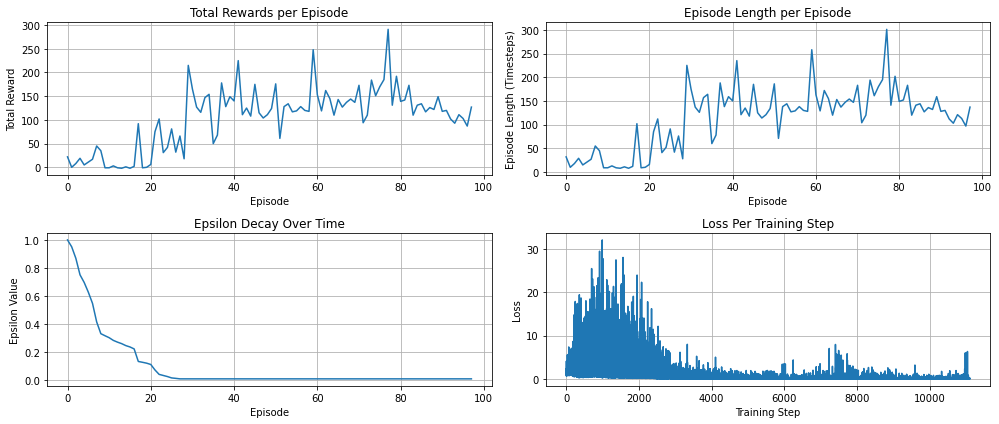

In [ ]:
if __name__ == "__main__":
    main()

## Explanation of Training Stats for CartPole DQN Model

The above four graphs in the image represent key metrics tracked during the training process of a Deep Q-Network (DQN) on the CartPole problem. These plots help visualize how the model learns over time. Here's a breakdown of each graph:

#### 1. **Top Left: Total Rewards per Episode**

- **Description**: This graph shows the total rewards achieved in each episode.
- **Insight**: The reward in the CartPole environment is based on how long the pole stays upright. Initially, the rewards fluctuate a lot, indicating the agent is still learning. As training progresses, there might be an upward trend, showing the agent is getting better at balancing the pole for longer durations. However, fluctuations are common due to exploration.
- **Takeaway**: As the model improves, we expect to see a general increase in the rewards over episodes, even though there may still be variations due to the exploration-exploitation trade-off.

#### 2. **Top Right: Rolling Average of Rewards**

- **Description**: This plot  represents a **rolling average** of the total rewards over a fixed window of episodes (e.g., a 10-episode rolling average). Smoothing out the raw reward data provides a clearer view of the agent's learning progress over time.
- **Insight**: Unlike the more volatile raw rewards graph, this smoothed version helps identify the overall trend in learning performance. If the agent is learning, you'll see an upward trend, meaning the agent is consistently performing better.
- **Takeaway**: A steady increase in the rolling average rewards signals consistent improvement in the agent’s ability to balance the pole over time.

#### 3. **Bottom Left: Epsilon Decay (Exploration Rate)**

   - **Description**: This graph represents the **epsilon decay** over episodes. Epsilon controls the exploration-exploitation trade-off: at the beginning of training, the agent explores more by choosing random actions (high epsilon), and as training progresses, epsilon decreases, meaning the agent exploits its learned policy more.
   - **Insight**: The graph shows a steep decline, indicating that early in training, the agent is exploring more, but as epsilon decays, it starts exploiting the learned Q-values. Eventually, epsilon reaches a minimum value (usually 0.01), where the agent almost always chooses actions based on its learned policy.
   - **Takeaway**: This decline in exploration is crucial for converging to a good policy. Initially, exploration allows the agent to learn a variety of state-action pairs, and later exploitation ensures it uses what it has learned to maximize rewards.

#### 4. **Bottom Right: Loss per Batch**

- **Description**: This graph tracks the **loss per training step** during experience replay. The loss measures how far the predicted Q-values are from the target Q-values (calculated using the Bellman equation).
- **Insight**: Initially, there may be large fluctuations in loss values as the agent randomly explores and updates its Q-values. Over time, the loss generally decreases as the model stabilizes and predictions become more accurate. Spikes in loss can still occur, especially when the agent encounters novel states or transitions.
- **Takeaway**: A decreasing trend in loss is a sign that the model is learning effectively and its Q-value predictions are becoming more accurate. Consistent spikes are normal but should smooth out as the model converges.

### Summary of Training Process:

1. **Exploration (High Epsilon)**: At the start, the agent explores the environment extensively, leading to a wide range of rewards. This phase is necessary for the agent to learn about different state-action pairs.
   
2. **Exploitation (Low Epsilon)**: As epsilon decays, the agent relies more on the learned Q-values and starts exploiting its knowledge to accumulate more rewards consistently.

3. **Reward Growth**: As training progresses, both the raw rewards and rolling average rewards increase, showing that the agent is improving its ability to balance the cart.

4. **Loss Reduction**: The loss values decrease over time, indicating the agent’s Q-values are becoming more accurate, and the network is converging toward an optimal policy.